In [1]:
import glob
import numpy as np
from aglaia.wrappers import OMNN
import seaborn as sns

/Users/walfits/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
filenames = glob.glob("/Volumes/Transcend/data_sets/vr_ccsd/*.xyz")
filenames.sort()

In [3]:
filenames_test = glob.glob("/Volumes/Transcend/data_sets/ccsd_30_f12/*.xyz")
filenames_test.sort()

In [4]:
energies_train= np.loadtxt('/Volumes/Transcend/data_sets/vr_ccsd/properties.txt', usecols=[1])

In [5]:
energies_test = np.loadtxt("/Volumes/Transcend/data_sets/ccsd_30_f12/properties.txt", usecols=[1])

In [7]:

sns.set()
x_train = range(len(filenames))
x_test = range(len(filenames_test))
plt.scatter(x_train, energies_train)
plt.scatter(x_test, energies_test)
plt.show()

NameError: name 'filenames' is not defined

In [7]:
energies_random = np.random.uniform(low=-150, high=150, size=energies_train.shape)

In [8]:
# This calculates the mean absolute error if the predictions were predicted at random
error = abs(energies_train - energies_random)
mae = np.mean(error)
print(mae)

83.0785051185921


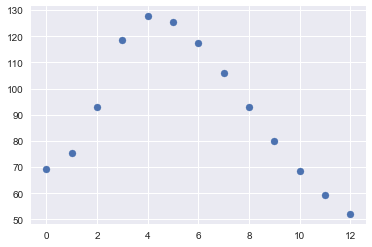

In [9]:
y_predict = [ 69.45159912,   75.44535065,   92.87255859,  118.68275452,  127.65605164,
  125.49275208,  117.58058167,  105.99801636,   92.85910034,   80.04930878,
   68.68952942,   59.31467438,   52.10765076]
plt.scatter(x_test, y_predict)
plt.show()

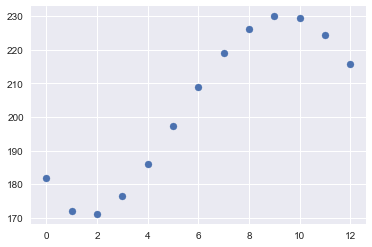

In [10]:
plt.scatter(x_test, energies_test)
plt.show()

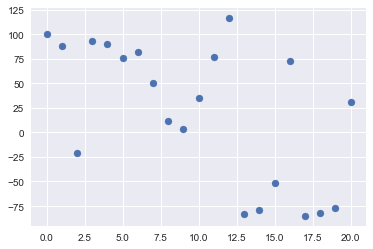

In [11]:
vr_test = [ 99.873936,
 87.979957,
-20.730081,
 92.844280,
 89.617417,
 76.137664,
 81.527775,
 50.605905,
 11.828560,
  3.509995,
 35.300969,
 76.678007,
116.282687,
-83.023564,
-79.366016,
-51.520512,
 72.741653,
-85.056046,
-82.538496,
-76.645031,
 30.508450]
x = range(len(vr_test))
plt.scatter(x, vr_test)
plt.show()

In [3]:
nn_ene = [43.68796158,  46.50385666,  50.27166748,  43.44013977,  38.04870987,
  43.66060638,  52.57338715,  48.67595291,  41.53319168,  38.42328262,
  39.00601196,  39.37991333,  38.59699249,  38.31803131,  38.13309097,
  37.80202103,  41.52919006,  49.11985779,  47.7583313 ,  33.47608948,
  19.8224678 ,   1.53460824, -13.77292728, -27.08266449, -29.04021263,
 -28.76976776, -27.09317207, -25.81274033, -26.7318306 , -30.56627274,
 -44.04653168, -49.83747101, -49.83747101, -53.87350082, -55.71294403,
 -55.77565765, -54.9677124 , -60.28560638, -61.8693924 , -61.78545761,
 -61.75941086, -62.24051666, -62.08134842, -60.34580994, -58.20375824,
 -58.59225464, -57.15772247, -55.02694702]
ccsd_ene = [ 52.27812655,  44.26784982,  42.62628204,  37.25325966,  36.02123621,
  45.55234734,  59.47963926,  62.17281901,  59.62678644,  56.34922253,
  52.11875436,  43.42684211,  33.32479271,  28.56214275,  31.1318115,
  36.26081888,  43.06461584,  56.7944684 ,  42.70194989,  24.37940562,
   6.44445159, -10.45143008, -21.00264782, -26.96548922, -26.33573335,
 -25.04788655, -24.0942015 , -24.55650087, -26.94687123, -31.43444889,
 -44.4876097 , -50.48836566, -50.48836566, -55.69161996, -59.98397521,
 -63.6046663 , -65.58599004, -72.04355127, -72.55430539, -71.90258381,
 -71.2833757 , -69.78955664, -66.78669508, -63.25847594, -61.56630283,
 -60.14015234, -57.76444395, -53.51888587]

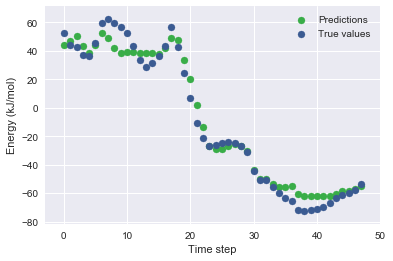

In [12]:
import matplotlib.pyplot as plt
sns.set()
x = range(len(nn_ene))
line_1 = plt.scatter(x, nn_ene, c=sns.xkcd_rgb["medium green"], label="Predictions")
line_2 = plt.scatter(x, ccsd_ene, c=sns.xkcd_rgb["denim blue"], label="True values")
plt.xlabel("Time step")
plt.ylabel("Energy (kJ/mol)")
plt.legend(handles=[line_1, line_2])
plt.savefig("coulombmat.png", dpi=300)
plt.show()

In [14]:
nn_new_batch = [  38.53145599,  25.03665924,  19.98384857,  24.09822845,  34.72150421,
  44.06775284,  50.6104126 ,  53.82290268,  56.38282776,  56.85885239,
  54.34848785,  50.99639893,  47.65394592,  44.65138626,  45.4331398,
  47.65507507,  49.60478592,  49.91469574,  49.02122498,  38.29598236,
  22.43026352,   4.99543285,  -8.33786678, -23.72808456, -28.03012085,
 -31.31249619, -32.95451736, -34.34753799, -36.47184372, -39.61435318,
 -47.28459549, -49.88910294, -49.88910294, -51.77205658, -52.96347809,
 -53.31656647, -52.79175568, -57.17182159, -58.86229706, -58.88393402,
 -58.80289459, -58.99442291, -58.38799286, -56.17914581, -54.67563629,
 -58.00696564, -57.19693756, -55.04827118]

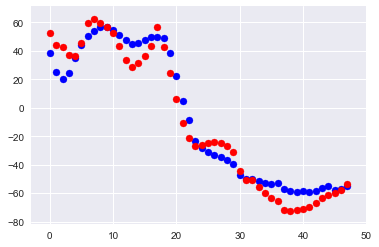

In [15]:
x = range(len(nn_ene))
plt.scatter(x, nn_new_batch, c=sns.xkcd_rgb["medium green"])
plt.scatter(x, ccsd_ene, c="red")
plt.show()

In [16]:
nn_new_desc = [53.710144,   45.053368,  43.914963,  38.729733,   38.428772,  46.88574 ,
  56.50495 ,   55.473434,  51.40634 ,  50.016922,   51.792248,  48.78826 ,
  39.28907 ,   32.51059 ,  33.706657,  38.740135,   46.304756,  56.97952 ,
  40.553772,   22.166454,   6.547818, -11.906872,  -23.246323, -24.48344 ,
 -22.67745 ,  -21.33665 , -20.319681, -19.61951 ,  -22.115692, -25.85098 ,
 -40.25711 ,  -45.562946, -45.562946, -50.247448,  -54.7614  , -58.80593 ,
 -61.279255,  -69.18987 , -69.5548  , -68.96032 ,  -68.54258 , -67.52903 ,
 -65.06315 ,  -61.90514 , -61.019363, -59.81913 ,  -57.314598, -53.02821]

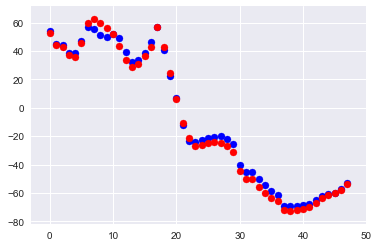

In [17]:
x = range(len(nn_ene))
plt.scatter(x, nn_new_desc, c="blue")
plt.scatter(x, ccsd_ene, c="red")
plt.show()

In [5]:
long_training_descriptor = [54.332527,  45.38627 ,  44.096916,  38.220226,  37.145027,  46.19144,
  56.346336,  55.910812,  52.709072,  51.714867,  52.722473,  48.39445,
  38.29962 ,  31.658745,  33.803764,  38.350334,  45.096287,  55.23481,
  43.084274,  23.647835,   7.207653, -10.268221, -21.955341, -25.58916,
 -24.06646 , -23.726954, -21.883713, -22.319284, -24.86399 , -28.420612,
 -42.43748 , -47.78588 , -47.78588 , -52.228134, -56.397118, -59.884228,
 -61.832134, -69.58528 , -70.09914 , -69.36957 , -68.59343 , -67.608864,
 -65.09514 , -61.794212, -60.681087, -60.196507, -57.743336, -53.142986]

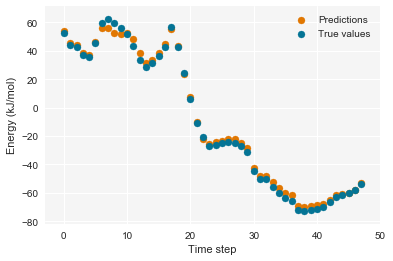

In [8]:
import matplotlib.pyplot as plt
sns.set(rc={'axes.facecolor':'F5F5F5'})
x = range(len(nn_ene))
line_1 = plt.scatter(x, long_training_descriptor, c=sns.xkcd_rgb["pumpkin"], label="Predictions")
line_2 = plt.scatter(x, ccsd_ene, c=sns.xkcd_rgb["sea blue"], label="True values")
plt.xlabel("Time step")
plt.ylabel("Energy (kJ/mol)")
plt.legend(handles=[line_1, line_2])
plt.savefig("SLATM.png", dpi=300)
plt.show()
x = range(len(nn_ene))